In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint



In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Bondora_Features_Selection_File.csv')
df2.head()

,Unnamed: 0,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,Target
0,0,0,30.0,119.083443,5,115.0408,1,0.00,0.00,83.0852,0.0000,0
1,1,0,25.0,119.083443,5,140.6057,2,0.00,0.00,255.6467,258.6256,0
2,2,0,25.0,119.083443,5,203.1909,0,116.35,414.07,0.0000,0.0000,1
3,3,0,45.0,119.083443,5,57.5205,1,0.00,0.00,134.2144,0.0000,0
4,4,0,30.0,119.083443,5,319.5436,1,0.00,0.00,146.9966,0.0000,1


In [ ]:
df2=df2.drop(['Unnamed: 0'],axis=1)

SCALING THE TRAIN AND TEST DATA

In [ ]:
# Split the data into features (X) and target (y)
X = df2.drop('Target', axis=1)
y = df2['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (107623, 10)
y_train: (107623,)
X_test: (26906, 10)
y_test: (26906,)


IMPORT THE RANDOM FOREST

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 ... 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17892   261]
 [  904  7849]]


CONFUSION MATRIX

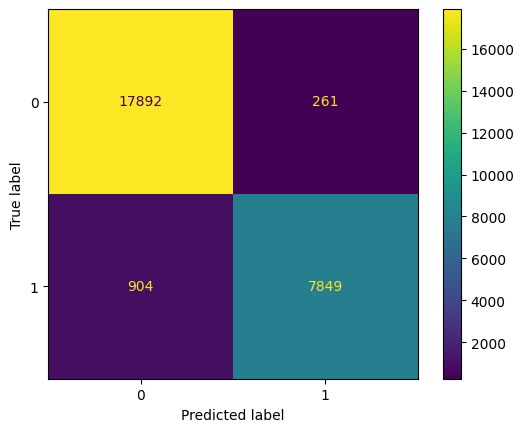

In [ ]:
# Generate predictions with the best model
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

ACCURRACY

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9567011075596521


CLASSIFICATION REPORT

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18153
           1       0.97      0.90      0.93      8753

    accuracy                           0.96     26906
   macro avg       0.96      0.94      0.95     26906
weighted avg       0.96      0.96      0.96     26906



PIPELINE FOR RANDOM FOREST

In [ ]:
from sklearn.pipeline import Pipeline
import pickle
pipeline_randomforest=Pipeline([('model',RandomForestClassifier())])

In [ ]:
pipeline_randomforest.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [ ]:
y_data_pred = pipeline_randomforest.predict(X_test)
print(y_data_pred)

[0 1 0 ... 0 1 1]


In [ ]:
accuracy_pipeline_randomforest = accuracy_score(y_test, y_data_pred)
print("Accuracy:", accuracy_pipeline_randomforest)

Accuracy: 0.9558834460715082


SAVE THE PIPELINE OF CLASSIFICATION

In [ ]:
pickle.dump(pipeline_randomforest, open('/content/drive/MyDrive/RandomForest_Classification', 'wb'))

# FINANCIAL RISK MODULING

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bondora_raw.csv',low_memory=False)

In [ ]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

In [ ]:
df.shape

(134529, 112)

CHECKING FOR NULL VALUES

In [ ]:
df.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [ ]:
df.isna().mean().round(3) * 100

ReportAsOfEOD                           0.0
LoanId                                  0.0
LoanNumber                              0.0
ListedOnUTC                             0.0
BiddingStartedOn                        0.0
                                       ... 
NrOfScheduledPayments                  27.3
ReScheduledOn                          70.0
PrincipalDebtServicingCost             56.0
InterestAndPenaltyDebtServicingCost    56.0
ActiveLateLastPaymentCategory          61.2
Length: 112, dtype: float64

CONVERT STATUS COLUMN INTO TARGET

In [ ]:
df['Target'] = np.where(df['DefaultDate'].isna(), '0', '1')
df['Target'].head()

0    0
1    0
2    1
3    0
4    1
Name: Target, dtype: object

In [ ]:
df['LoanDate'].isnull().sum()

0

In [ ]:
df['LoanDate']

0         2009-06-16
1         2009-06-15
2         2009-06-15
3         2009-06-15
4         2009-06-14
             ...    
134524    2015-01-06
134525    2015-01-06
134526    2015-01-06
134527    2015-01-06
134528    2015-01-06
Name: LoanDate, Length: 134529, dtype: object

In [ ]:
df['MaturityDate_Original'].isnull().sum()

0

LOAN TENURE CALCULATION

In [ ]:
df[['MaturityDate_Last','LoanDate']].head()

,MaturityDate_Last,LoanDate
0,2010-06-25,2009-06-16
1,2009-07-15,2009-06-15
2,2014-05-13,2009-06-15
3,2010-09-15,2009-06-15
4,2010-06-25,2009-06-14


PAST APPLICATIONS

In [ ]:
df['LoanDuration']

0         12
1          1
2         20
3         15
4         12
          ..
134524    60
134525    60
134526    60
134527    60
134528    60
Name: LoanDuration, Length: 134529, dtype: int64

PREDICTED APPLICATIONS

In [ ]:

df[['MaturityDate_Last','LoanDate']] = df[['MaturityDate_Last','LoanDate']].apply(pd.to_datetime)


In [ ]:
#df['LoanTenure'] =(( df.MaturityDate_Last.dt.year-df.LoanDate.dt.year)*12+(df.MaturityDate_Last.dt.month-df.LoanDate.dt.month))
df['LoanTenure'] = ((df.MaturityDate_Last - df.LoanDate)/np.timedelta64(1, 'M'))
df['LoanTenure']


0         12.287727
1          0.985647
2         58.908807
3         15.014682
4         12.353436
            ...    
134524    60.912955
134525    49.479455
134526    60.912955
134527    66.892544
134528    67.188238
Name: LoanTenure, Length: 134529, dtype: float64

In [ ]:
df[['MaturityDate_Last','LoanDate','LoanDuration']].head()

,MaturityDate_Last,LoanDate,LoanDuration
0,2010-06-25,2009-06-16,12
1,2009-07-15,2009-06-15,1
2,2014-05-13,2009-06-15,20
3,2010-09-15,2009-06-15,15
4,2010-06-25,2009-06-14,12


Equated Monthly Installments (EMI) CALCULATION


In [ ]:
df[['Amount','Interest','LoanTenure']].head()

,Amount,Interest,LoanTenure
0,115.0408,30.0,12.287727
1,140.6057,25.0,0.985647
2,319.5409,25.0,58.908807
3,57.5205,45.0,15.014682
4,319.5436,30.0,12.353436


RESULT_1 CALULATION

In [ ]:
 p=df['Amount']
 r=df['Interest']/12/100
 n=df['LoanTenure']
 result_1 = p * r * (1 + r)**n
 result_1.head()

0     3.895506
1     2.989427
2    22.428711
3     3.748955
4    10.837939
dtype: float64

RESULT_2 CALCULATION

In [ ]:
result_2 = ((1 + r)**n)-1
result_2.head()

0    0.354478
1    0.020531
2    2.369140
3    0.738026
4    0.356677
dtype: float64

EMI CALCULATION

In [ ]:
df['EMI']=result_1/result_2
df['EMI'].head()

0     10.989417
1    145.603739
2      9.467025
3      5.079705
4     30.385832
Name: EMI, dtype: float64

In [ ]:
# Replace infinite updated data with nan
#df['EMI'].replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN#
#df['EMI'].dropna(inplace=True)


In [ ]:
df[['Amount','Interest','LoanTenure','EMI']].head()

,Amount,Interest,LoanTenure,EMI
0,115.0408,30.0,12.287727,10.989417
1,140.6057,25.0,0.985647,145.603739
2,319.5409,25.0,58.908807,9.467025
3,57.5205,45.0,15.014682,5.079705
4,319.5436,30.0,12.353436,30.385832


CHECK THE AMOUNT IS BELOW  ZERO OR NOT

In [ ]:
df['Amount'][df['Amount'] < 0]

Series([], Name: Amount, dtype: float64)

In [ ]:
df['EMI'].isnull().sum()

0

In [ ]:
max(df['EMI'])

331795.6187173208

In [ ]:
df['EMI'].nlargest(2)

70650    331795.618717
55534    330842.036336
Name: EMI, dtype: float64

In [ ]:
df['EMI'].nlargest(1)

70650    331795.618717
Name: EMI, dtype: float64

REPLACE INFINIE VALUES INTO NAN THEN DROPPED VALUES

In [ ]:
r=df['EMI']

In [ ]:
r.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
r.dropna(inplace=True)
print(r)

0          10.989417
1         145.603739
2           9.467025
3           5.079705
4          30.385832
             ...    
134524     98.304644
134525     86.717094
134526     72.573202
134527     70.924813
134528     93.580377
Name: EMI, Length: 134529, dtype: float64


In [ ]:
df['EMI']=r

In [ ]:
df['EMI'][df['EMI'] < 0]

Series([], Name: EMI, dtype: float64)

In [ ]:
df['EMI'].nlargest(1)

70650    331795.618717
Name: EMI, dtype: float64

Eligible Loan Amount (ELA)


REQUIRED COMPONENTS

In [ ]:

df[['AppliedAmount','Interest','LoanTenure','IncomeTotal','LiabilitiesTotal']].head()

,AppliedAmount,Interest,LoanTenure,IncomeTotal,LiabilitiesTotal
0,319.5582,30.0,12.287727,10500.0,0.0
1,191.7349,25.0,0.985647,10800.0,0.0
2,319.5582,25.0,58.908807,7000.0,0.0
3,127.8233,45.0,15.014682,11600.0,0.0
4,319.5582,30.0,12.353436,6800.0,0.0


In [ ]:
df[['AppliedAmount','Interest','LoanTenure','IncomeTotal','LiabilitiesTotal']].isnull().sum()

AppliedAmount       0
Interest            0
LoanTenure          0
IncomeTotal         0
LiabilitiesTotal    0
dtype: int64

In [ ]:
df['LiabilitiesTotal']

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
134524     500.00
134525    1777.46
134526    1350.00
134527     732.05
134528     531.03
Name: LiabilitiesTotal, Length: 134529, dtype: float64

In [ ]:
max(df['LiabilitiesTotal'])

12400000.0

REQUIRED FEATURES FOR ELA

In [ ]:
A=df['AppliedAmount']
#convert interest into monthly basis
R=df['Interest']/12/100
N=df['LoanTenure']
I=df['IncomeTotal']
L=df['LiabilitiesTotal']

In [ ]:
L

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
134524     500.00
134525    1777.46
134526    1350.00
134527     732.05
134528     531.03
Name: LiabilitiesTotal, Length: 134529, dtype: float64

TOTAL PAYMENT DUE CALCULATION

In [ ]:
df['Total_Payment_Due'] = (A + (A*R) * N)
df['Total_Payment_Due'].head()

0    417.724295
1    195.672042
2    711.741375
3    199.794283
4    418.249248
Name: Total_Payment_Due, dtype: float64

In [ ]:
df['Total_Payment_Due'][df['Total_Payment_Due'] < 0]

Series([], Name: Total_Payment_Due, dtype: float64)

In [ ]:
df['Total_Payment_Due']

0          417.724295
1          195.672042
2          711.741375
3          199.794283
4          418.249248
             ...     
134524    7722.276843
134525    5257.500154
134526    5650.976406
134527    5966.684326
134528    8123.103144
Name: Total_Payment_Due, Length: 134529, dtype: float64

In [ ]:
df[['AppliedAmount','Interest','LoanTenure','Total_Payment_Due']].head()

,AppliedAmount,Interest,LoanTenure,Total_Payment_Due
0,319.5582,30.0,12.287727,417.724295
1,191.7349,25.0,0.985647,195.672042
2,319.5582,25.0,58.908807,711.741375
3,127.8233,45.0,15.014682,199.794283
4,319.5582,30.0,12.353436,418.249248


MAX ALLOWABLE AMOUNT

In [ ]:
df['Max_Allowable_Amount'] = (I - L) *(30/100)
df['Max_Allowable_Amount'].head()

0    3150.0
1    3240.0
2    2100.0
3    3480.0
4    2040.0
Name: Max_Allowable_Amount, dtype: float64

CHECK MAXIMUM ALLOWABLE AMOUNT IS BELOW ZERO CONSIDERED AS ZERO

In [ ]:

# checking the element is < 0
df['Max_Allowable_Amount'][df['Max_Allowable_Amount'] < 0] =0
df['Max_Allowable_Amount'][df['Max_Allowable_Amount'] > 0]

0         3150.000
1         3240.000
2         2100.000
3         3480.000
4         2040.000
            ...   
134522     228.000
134523     321.978
134524     270.000
134525     146.262
134526     345.000
Name: Max_Allowable_Amount, Length: 129110, dtype: float64

In [ ]:
df['Max_Allowable_Amount'][df['Max_Allowable_Amount'] == 0]

468       0.0
493       0.0
494       0.0
501       0.0
523       0.0
         ... 
134501    0.0
134514    0.0
134516    0.0
134527    0.0
134528    0.0
Name: Max_Allowable_Amount, Length: 5419, dtype: float64

In [ ]:
df[['IncomeTotal','LiabilitiesTotal','Max_Allowable_Amount']].head()

,IncomeTotal,LiabilitiesTotal,Max_Allowable_Amount
0,10500.0,0.0,3150.0
1,10800.0,0.0,3240.0
2,7000.0,0.0,2100.0
3,11600.0,0.0,3480.0
4,6800.0,0.0,2040.0


DEFINE ELIGIBLE LOAN AMOUNT

In [ ]:
df.loc[df['Total_Payment_Due'] <= df['Max_Allowable_Amount'], 'ELA'] = A
df.loc[df['Total_Payment_Due'] > df['Max_Allowable_Amount'], 'ELA'] = df['Max_Allowable_Amount']

CANDIDATED WHO GET EXACT AMOUNT

In [ ]:
df[(df['Total_Payment_Due']) <= (df['Max_Allowable_Amount'])]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target,LoanTenure,EMI,Total_Payment_Due,Max_Allowable_Amount,ELA
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,12.287727,10.989417,417.724295,3150.000,319.5582
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0.985647,145.603739,195.672042,3240.000,191.7349
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38

CANDIDATED WHO GET MAXIMUM ELIGIBLE AMOUNT

In [ ]:
df[(df['Total_Payment_Due']) > (df['Max_Allowable_Amount'])]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target,LoanTenure,EMI,Total_Payment_Due,Max_Allowable_Amount,ELA
84,2020-01-27,F910D7FE-66F2-4440-B0BB-9BDE010CD487,321,2009-04-01 16:18:46,2009-04-01 16:18:46,0,0,185.3439,kiisupreili,True,2009-04-01 16:18:46,2009-04-15,2016-07-28,2009-05-15,2011-04-15,2013-04-29,16,4,2.0,1,30,1978-11-24,1.0,EE,639.1165,185.3442,30.00,24,NaN,HARJU,TALLINN,7,3.0,1.0,2,2.0,NaN,NaN,10To15Years,9.0,NaN,3000.0,0.0,0.0,0.0,0.0,0.0,1000.0,4000.0,0,0.00,0,0.00,0.00,15,True,185.3442,90.7637,2016-06-22,NaN,NaN,2523.0,2013-02-28,NaN,NaN,NaN,NaN,2009-08-17,NaN,167.71,49.93,179.5104,174.8767,179.5104,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,True,NaN,180+,NaN,NaN,NaN,NaN,185.3442,90.7437,0.00,0.02,0.00,0.00,0,0.000,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+,1,48.460954,6.640416,1413.421383,1200.000,1200.000
393,2020-01-27,F6FE1710-B5EF-4E89-B7A6-9BFA015713D1,455,2009-04-29 20:49:06,2009-04-29 20:49:06,0,0,134.2144,kiisupreili,True,2009-04-29 20:49:06,2009-05-07,2012-02-29,2009-06-26,2011-05-26,2013-04-29,20,4,2.0,1,30,1978-11-24,1.0,EE,511.2932,134.1923,40.00,24,NaN,HARJU,TALLINN,7,1.0,1.0,2,2.0,NaN,pagar,2To5Years,1.0,NaN,3000.0,0.0,0.0,0.0,0.0,0.0,1000.0,4000.0,0,0.00,0,0.00,0.00,26,True,134.1923,200.9200,2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-29,NaN,114.20,41.80,126.5906,126.5906,126.5906,35.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,True,NaN,180+,NaN,NaN,NaN,NaN,134.1923,35.0900,0.00,0.00,0.00,0.00,2,447.374,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,1,47.738147,5.655107,1324.899524,1200.000,1200.000
395,2020-01-27,5A1C3598-937B-4C7B-B004-9BF9011CC21F,450,2009-04-28 17:16:46,2009-04-28 17:16:46,0,0,172.5616,-ketu16-,True,2009-04-28 17:16:46,2009-05-08,2015-10-13,2009-06-25,2011-05-25,2011-05-25,17,3,2.0,1,19,1989-12-01,1.0,EE,255.6466,172.5604,40.00,24,NaN,VÕRU MAAKOND,VÕRU,4,2.0,3.0,0,NaN,NaN,NaN,LessThan2Years,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,1500.0,0,0.00,0,0.00,0.00,25,True,2700.0000,1315.3300,2015-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-26,NaN,129.31,39.62,146.8667

In [ ]:
df['ELA'].info

<bound method Series.info of 0         319.5582
1         191.7349
2         319.5582
3         127.8233
4         319.5582
            ...   
134524    270.0000
134525    146.2620
134526    345.0000
134527      0.0000
134528      0.0000
Name: ELA, Length: 134529, dtype: float64>

In [ ]:
min(df['ELA'])

0.0

In [ ]:
df[['AppliedAmount','Total_Payment_Due','Max_Allowable_Amount','ELA']].head()

,AppliedAmount,Total_Payment_Due,Max_Allowable_Amount,ELA
0,319.5582,417.724295,3150.0,319.5582
1,191.7349,195.672042,3240.0,191.7349
2,319.5582,711.741375,2100.0,319.5582
3,127.8233,199.794283,3480.0,127.8233
4,319.5582,418.249248,2040.0,319.5582


Preferred Return on Investment (PROI)


In [ ]:
df[['AppliedAmount','Interest','LoanTenure','IncomeTotal','LiabilitiesTotal','DebtToIncome']].head()


,AppliedAmount,Interest,LoanTenure,IncomeTotal,LiabilitiesTotal,DebtToIncome
0,319.5582,30.0,12.287727,10500.0,0.0,0.0
1,191.7349,25.0,0.985647,10800.0,0.0,0.0
2,319.5582,25.0,58.908807,7000.0,0.0,0.0
3,127.8233,45.0,15.014682,11600.0,0.0,0.0
4,319.5582,30.0,12.353436,6800.0,0.0,0.0


Excluding the interest and liabilities total

In [ ]:
df[['AppliedAmount','LoanTenure','IncomeTotal','DebtToIncome','Target']].head()

,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome,Target
0,319.5582,12.287727,10500.0,0.0,0
1,191.7349,0.985647,10800.0,0.0,0
2,319.5582,58.908807,7000.0,0.0,1
3,127.8233,15.014682,11600.0,0.0,0
4,319.5582,12.353436,6800.0,0.0,1


In [ ]:
min(df['AppliedAmount'])

31.9558

In [ ]:
max(df['AppliedAmount'])

10632.0

WOE AND IV CALCULATIONS

SORTING OF APPLIED AMOUNT

In [ ]:
df=df.sort_values(by="AppliedAmount",ascending=True,kind="mergesort")

In [ ]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target,LoanTenure,EMI,Total_Payment_Due,Max_Allowable_Amount,ELA
55,2020-01-27,C68975EA-8338-4C9E-A2D8-9BCE0138406B,176,2009-03-16 18:56:52,2009-03-16 18:56:52,0,0,31.9558,RUSPAS10,True,2009-03-16 18:56:52,2009-03-17,2009-06-07,2009-05-07,2009-05-07,2009-05-07,18,2,2.0,1,23,1985-04-10,0.0,EE,31.9558,31.9558,30.0,1,NaN,HARJU,TALLINN,8,3.0,3.0,0,2.0,NaN,Kokk,2To5Years,NaN,NaN,3400.0,0.0,0.0,0.0,0.0,0.0,600.0,4000.0,0,0.0,0,0.0,0.0,7,True,500.0,20.44,2009-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,31.9558,0.7516,0.0,0.0,0.0,0.0,0,0.0000,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,1.675599,19.710880,33.294428,1200.0,31.9558
249,2020-01-27,360E08AF-BC7C-4841-8BF1-9C8E010B5542,1177,2009-09-24 16:13:19,2009-09-24 16:13:19,0,0,31.9558,RUSPAS10,False,2009-09-24 16:13:19,2009-09-25,2009-10-26,2009-10-27,2009-10-27,2009-10-27,17,5,2.0,1,24,1985-04-10,0.0,EE,31.9558,31.9558,29.0,1,NaN,HARJU,TALLINN,0,3.0,3.0,0,2.0,NaN,Kokk,2To5Years,9.0,NaN,3300.0,0.0,0.0,0.0,0.0,0.0,600.0,3900.0,0,0.0,0,0.0,0.0,27,True,500.0,10.66,2009-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,31.9558,0.6302,0.0,0.0,0.0,0.0,1,31.9558,32.7074,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,1.051356,31.148392,32.767726,1170.0,31.9558
363,2020-01-27,F9A55E8A-74CD-437D-9FDA-9CD400A38726,1483,2009-12-03 09:55:23,2009-12-03 09:55:23,0,0,31.9558,BO57KKKA,False,2009-12-03 09:55:23,2009-12-05,2010-01-11,2010-01-11,2010-01-11,2010-01-11,9,5,2.0,1,22,1987-11-04,0.0,EE,31.9558,31.9558,49.0,1,NaN,HARJU,TALLINN,3,5.0,3.0,0,5.0,UpTo3Years,Tegevjuht,5To10Years,11.0,NaN,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0,0.0,0,0.0,0.0,10,True,500.0,7.03,2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,31.9558,0.4493,0.0,0.0,0.0,0.0,3,690.2464,502.8007,0.0,0,NaN,

CONSIDERED FEATIRED FOR FEATURE 1 WOE CALCULATIONS

In [ ]:
data=df[['AppliedAmount','Target']]

In [ ]:
data

,AppliedAmount,Target
55,31.9558,0
249,31.9558,0
363,31.9558,0
372,31.9558,0
437,31.9558,0
...,...,...
132534,10632.0000,0
132841,10632.0000,0
132852,10632.0000,0
133057,10632.0000,0


SPLITTING THE DATA INTO 30 BINS

In [ ]:
AppliedAmount_data_split = np.array_split(data, 30)

In [ ]:
AppliedAmount_data_split[0]

,AppliedAmount,Target
55,31.9558,0
249,31.9558,0
363,31.9558,0
372,31.9558,0
437,31.9558,0
...,...,...
11896,530.0000,1
11915,530.0000,0
11921,530.0000,0
11931,530.0000,0


In [ ]:
len(AppliedAmount_data_split)

30

TOTAL NUMBER OF NOT DEFAULTED CASES

In [ ]:
df['Target'].value_counts()['0']

91614

TOTAL NUMBER OF DEFAULTED CASES

In [ ]:
df['Target'].value_counts()['1']

42915

Here WOE - ve means the dataset has high defaulted cases

Here WOE +ve means the dataset has high not defaulted cases



1.   Information value  vs    Predictive power

2.   < 0.02                useless for prediction

3.   0.02 - 0.1	weak predictor
4.   0.1 - 0.3	medium predictor


5.   0.3 - 0.5	strong predictor


6. > 0.5	suspicious or too good



MOTO TONIC TREND FOLLOWED WHEN WE TAKE BINS AS 2

BUT WE WILL OBSERVE SOME - VE VALUES WHEN WE TAKE BINS AS 30

In [ ]:
Applied_amount=[]
iv=0
for i in range(30):
  d=AppliedAmount_data_split[i]
  loan_not_default=d['Target'].value_counts()['0']
  perc=(loan_not_default/91614)*100
  loan_default=d['Target'].value_counts()['1']
  perc2=(loan_default/42915)*100
  woe=np.log(loan_not_default/loan_default)
  print("WOE of interval : ",i,"::is",woe)
  print("Information value this interval:: ",((perc-perc2)*woe))
  iv=iv+((perc-perc2)*woe)
  print("Total Information value:: ",iv)
  Applied_amount.append(woe)
  print('\n')


w=pd.DataFrame(Applied_amount)





WOE of interval :  0 ::is 0.7942364095962638
Information value this interval::  0.09436604477587009
Total Information value::  0.09436604477587009


WOE of interval :  1 ::is -0.37489868289518397
Information value this interval::  1.5743502409541004
Total Information value::  1.6687162857299704


WOE of interval :  2 ::is -0.02274345523133118
Information value this interval::  0.06515839841686615
Total Information value::  1.7338746841468367


WOE of interval :  3 ::is 0.7921571017084037
Information value this interval::  0.08869790920146362
Total Information value::  1.8225725933483004


WOE of interval :  4 ::is 1.5800279241844788
Information value this interval::  3.5937727960674324
Total Information value::  5.416345389415733


WOE of interval :  5 ::is 2.7362210780689065
Information value this interval::  10.83929185354615
Total Information value::  16.255637242961882


WOE of interval :  6 ::is 1.55814461804655
Information value this interval::  3.4693576586875463
Total Informati

WOE APPLIED AMOUNT CURVE

<Figure size 640x480 with 0 Axes>

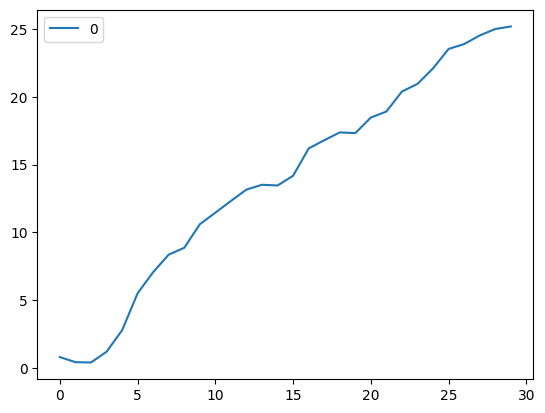

In [ ]:
w = w.cumsum()

plt.figure();

w.plot();

THE OVERALL INFIRMATIONAL VALUE IS < 0.1 -> WEAK PREDICTOR

APPLIED AMOUNT =530 -> INCREASE RISK

APPLIED AMOUNT =2125 -> INCREASE RISK

APPLIED AMOUNT < 3185 and >3000-> INCREASE RISK

In [ ]:
AppliedAmount_data_split[1]

,AppliedAmount,Target
11934,530.0,0
11950,530.0,0
11968,530.0,0
11972,530.0,1
11980,530.0,1
...,...,...
33275,530.0,1
33278,530.0,1
33280,530.0,1
33281,530.0,0


In [ ]:
AppliedAmount_data_split[2]

,AppliedAmount,Target
33288,530.0,1
33290,530.0,1
33293,530.0,1
33294,530.0,1
33296,530.0,1
...,...,...
45108,530.0,0
45110,530.0,0
45112,530.0,1
45116,530.0,1


In [ ]:
AppliedAmount_data_split[14]

,AppliedAmount,Target
9328,2125.0,0
9342,2125.0,1
9351,2125.0,1
9369,2125.0,1
9389,2125.0,0
...,...,...
78605,2125.0,0
78612,2125.0,0
78623,2125.0,1
78630,2125.0,0


In [ ]:
AppliedAmount_data_split[19]

,AppliedAmount,Target
3452,3000.0,1
3455,3000.0,1
3456,3000.0,1
3459,3000.0,0
3475,3000.0,0
...,...,...
29816,3185.0,0
29846,3185.0,1
29851,3185.0,1
29868,3185.0,0


SORTING THE LOAN TENURE

In [ ]:
df=df.sort_values(by="LoanTenure",ascending=True,kind="mergesort")

In [ ]:
df['LoanTenure']

3615        0.032855
6832        0.032855
7316        0.032855
103636      0.032855
113236      0.032855
             ...    
18762     144.430070
21549     144.922894
11519     146.664203
18752     149.456868
11543     150.278240
Name: LoanTenure, Length: 134529, dtype: float64

CONSIDERED FEATUTURED FOR WOE OF LOAN TENURE

In [ ]:
data=df[['LoanTenure','Target']]

MOTO TONIC TREND FOLLOWED WHEN WE TAKE BINS AS 2

WE CAN OBSERVE  -VE VALUES WHEN WE TAKE BINS AS 45

In [ ]:
LoanTenure_data_split = np.array_split(data, 45)

In [ ]:
tenure=[]
iv=0
for i in range(45):
  d=LoanTenure_data_split[i]
  loan_not_default=d['Target'].value_counts()['0']
  perc=(loan_not_default/91614)*100
  loan_default=d['Target'].value_counts()['1']
  perc2=(loan_default/42915)*100
  woe=np.log(loan_not_default/loan_default)
  print("WOE of interval : ",i,"::is",woe)
  print("Information value this interval:: ",((perc-perc2)*woe))
  iv=iv+((perc-perc2)*woe)
  print("Total Information value:: ",iv)
  print('\n')
  tenure.append(woe)

w2=pd.DataFrame(tenure)



WOE of interval :  0 ::is 3.1403910427830803
Information value this interval::  8.916824975775569
Total Information value::  8.916824975775569


WOE of interval :  1 ::is 1.649296787702211
Information value this interval::  2.662661754899474
Total Information value::  11.579486730675043


WOE of interval :  2 ::is 1.0746749755241831
Information value this interval::  0.7090291781098947
Total Information value::  12.288515908784937


WOE of interval :  3 ::is 1.1300755581238948
Information value this interval::  0.8654513495164059
Total Information value::  13.153967258301343


WOE of interval :  4 ::is 1.1446285259548166
Information value this interval::  0.9079293422215143
Total Information value::  14.061896600522857


WOE of interval :  5 ::is 1.0190248507497623
Information value this interval::  0.5607350771194366
Total Information value::  14.622631677642294


WOE of interval :  6 ::is 2.1250171103251163
Information value this interval::  4.615884449157653
Total Information value:

WOE CURVE OF LOAN TENURE

<Figure size 640x480 with 0 Axes>

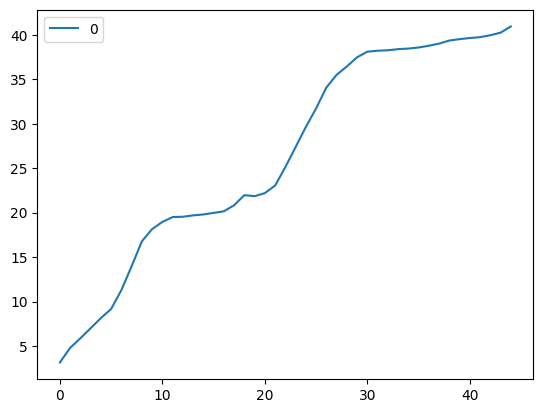

In [ ]:
w2 = w2.cumsum()

plt.figure();

w2.plot();

THE OVERALL INFIRMATIONAL VALUE IS < 0.1 -> WEAK PREDICTOR

LONE TENURE< 61-62 & 36-37 & 48-49->INCRESE RISK

In [ ]:
LoanTenure_data_split[19]

,LoanTenure,Target
46482,48.230970,0
49134,48.230970,0
60397,48.230970,1
63490,48.230970,0
89936,48.230970,0
...,...,...
41871,48.822358,0
68227,48.822358,0
46196,48.822358,0
1574,48.822358,0


SORTING THE INCOME TOTAL

In [ ]:
df=df.sort_values(by="IncomeTotal",ascending=True,kind="mergesort")

In [ ]:
df['IncomeTotal']

1137           0.0
20916          0.0
2475           0.0
18842          0.0
2607           0.0
           ...    
99858     235000.0
45931     235800.0
80192     280000.0
84505    1012019.0
64775    1012019.0
Name: IncomeTotal, Length: 134529, dtype: float64

In [ ]:
data=df[['IncomeTotal','Target']]

MOTO TONIC TREND FOLLOWED WHEN WE TAKE BINS AS 5

In [ ]:
IncomeTotal_data_split = np.array_split(data, 7)

THE VALUES OF WOE ALWAYS POSTIIVE

In [ ]:
incom=[]
iv=0
for i in range(7):
  d=IncomeTotal_data_split[i]
  loan_not_default=d['Target'].value_counts()['0']
  perc=(loan_not_default/91614)*100
  loan_default=d['Target'].value_counts()['1']
  perc2=(loan_default/42915)*100
  woe=np.log(loan_not_default/loan_default)
  print("WOE of interval : ",i,"::is",woe)
  print("Information value this interval:: ",((perc-perc2)*woe))
  iv=iv+((perc-perc2)*woe)
  print("Total Information value:: ",iv)
  print('\n')
  incom.append(woe)

w3=pd.DataFrame(incom)



WOE of interval :  0 ::is 0.9458350864847495
Information value this interval::  2.443137026300787
Total Information value::  2.443137026300787


WOE of interval :  1 ::is 0.9173472175186073
Information value this interval::  2.0211326270407586
Total Information value::  4.464269653341546


WOE of interval :  2 ::is 0.8373325203175151
Information value this interval::  0.9308678692431651
Total Information value::  5.395137522584712


WOE of interval :  3 ::is 0.8073249847313683
Information value this interval::  0.5596090165109747
Total Information value::  5.954746539095686


WOE of interval :  4 ::is 0.6875326929480671
Information value this interval::  -0.7044053332539223
Total Information value::  5.250341205841764


WOE of interval :  5 ::is 0.531917699257892
Information value this interval::  -1.7862628752100527
Total Information value::  3.464078330631711


WOE of interval :  6 ::is 0.6076908887430748
Information value this interval::  -1.3420593750707217
Total Information value:

WOE CURVE OF INCOME TOTAL

<Figure size 640x480 with 0 Axes>

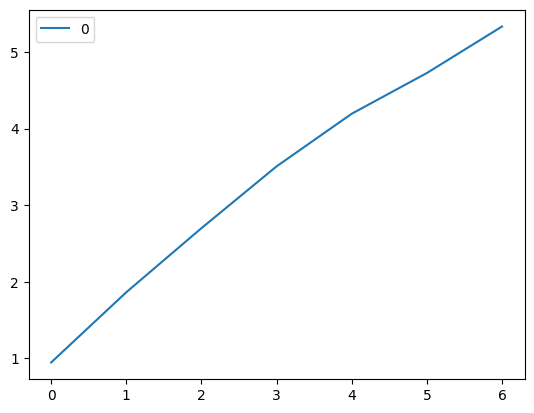

In [ ]:
w3= w3.cumsum()

plt.figure();

w3.plot();

THE OVERALL INFIRMATIONAL VALUE IS > 0.5 -> TOO STRONG PREDICTOR

INCOME TOTAL< 1012019 ->DECREASE RISK

In [ ]:
IncomeTotal_data_split[4]

,IncomeTotal,Target
32721,1400.0,0
5735,1400.0,0
18974,1400.0,0
28407,1400.0,1
82441,1400.0,0
...,...,...
133868,1800.0,0
131429,1800.0,0
108637,1800.0,0
118283,1800.0,0


REPLACE MISSING VALUES WITH MEAN

In [ ]:
mean_value=df['DebtToIncome'].mean()
df['DebtToIncome'].fillna(value=mean_value, inplace=True)

SORTING THE DEBT TO INCOME

In [ ]:
df=df.sort_values(by="DebtToIncome",ascending=True,kind="mergesort")

In [ ]:
df['DebtToIncome']

20916      0.00
2607       0.00
889        0.00
8938       0.00
930        0.00
          ...  
11636     77.00
74761     79.96
11665     83.33
11533    110.44
18769    198.02
Name: DebtToIncome, Length: 134529, dtype: float64

In [ ]:
data=df[['DebtToIncome','Target']]

In [ ]:
DebtToIncome_data_split = np.array_split(data, 9)

MOTO TONIC TREND FOLLOWED WHEN WE TAKE BINS AS 8

In [ ]:
Debt=[]
iv=0
for i in range(9):
  d=DebtToIncome_data_split[i]
  loan_not_default=d['Target'].value_counts()['0']
  perc=(loan_not_default/91614)*100
  loan_default=d['Target'].value_counts()['1']
  perc2=(loan_default/42915)*100
  woe=np.log(loan_not_default/loan_default)
  print("WOE of interval : ",i,"::is",woe)
  print("Information value this interval:: ",((perc-perc2)*woe))
  iv=iv+((perc-perc2)*woe)
  print("Total Information value:: ",iv)
  print('\n')
  Debt.append(woe)


w4=pd.DataFrame(Debt)





WOE of interval :  0 ::is 1.3982956801055086
Information value this interval::  8.647842610445716
Total Information value::  8.647842610445716


WOE of interval :  1 ::is 1.3608168617598564
Information value this interval::  7.996982083439198
Total Information value::  16.644824693884914


WOE of interval :  2 ::is 1.318115932463353
Information value this interval::  7.272471612901813
Total Information value::  23.917296306786728


WOE of interval :  3 ::is 1.1753772362669928
Information value this interval::  4.996864072023156
Total Information value::  28.914160378809882


WOE of interval :  4 ::is 0.9287336673867537
Information value this interval::  1.7015577096371364
Total Information value::  30.615718088447018


WOE of interval :  5 ::is 0.9077366796681705
Information value this interval::  1.4643030193762898
Total Information value::  32.080021107823306


WOE of interval :  6 ::is 0.45359629907614574
Information value this interval::  -1.6124251422765932
Total Information value

WOE CURVE OF DEBT TO INCOME

<Figure size 640x480 with 0 Axes>

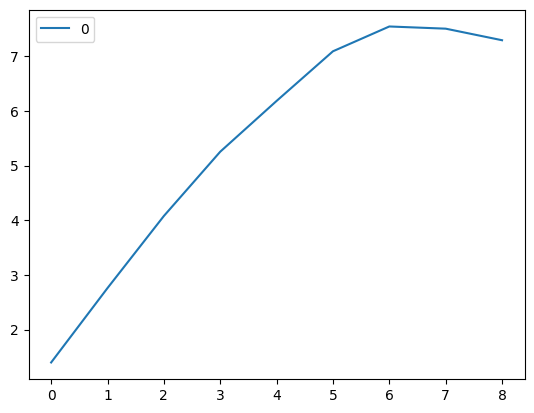

In [ ]:
w4 = w4.cumsum()

plt.figure();

w4.plot();

THE OVERALL INFIRMATIONAL VALUE IS < 0.5 -> TO STRONG PREDICTOR

ABOVE WE CAN OBSERVE THAT AFTER 7 TH INTERVAL THE SCORE IS BELOW 0 SO THAT MEANS INCREATE THE RISK

DEBIT TO INCOME< 9.18 -> DECREASE RISK

DEBIT TO INCOME > 9.18 -> INCREASE RISK

In [ ]:
DebtToIncome_data_split[7]

,DebtToIncome,Target
96297,9.18,1
8363,9.18,1
96191,9.18,1
17868,9.18,1
128345,9.18,1
...,...,...
3440,31.04,0
16799,31.04,0
3445,31.04,1
20220,31.04,0


In [ ]:
df[['ELA','LoanTenure','Interest']].head()

,ELA,LoanTenure,Interest
20916,0.0,2.037003,40.0
2607,0.0,3.909731,20.0
889,0.0,9.035093,49.0
8938,0.0,9.659336,30.0
930,0.0,12.616275,49.0


In [ ]:
print(min(df['ELA']))
print(max(df['ELA']))
print(min(df['LoanTenure']))
print(max(df['LoanTenure']))
print(min(df['Interest']))
print(max(df['Interest']))

0.0
25200.0
0.03285488408386209
150.2782397995852
3.0
264.31


Preferred ROI (PROI) Calculation Procedure:

CONSIDERED FEATURES

In [ ]:
P=df['Amount']
T=df['LoanTenure']/12 #FOR YEARLY BASIS
R=df['Interest']/100
E=df['ELA']
#SIMPLE INTREST =P*T*R
#ROI =INTREST AMOUNT/PREDICTED AMOUNT THAT IS SI/ELA

IA=(P*R*T)/E

In [ ]:
IA

20916            inf
2607             inf
889              inf
8938             inf
930              inf
            ...     
11636    1935.700254
74761      33.083043
11665       0.817081
11533            inf
18769            inf
Length: 134529, dtype: float64

In [ ]:
df['ROI']=IA


ROI VARIBLE

In [ ]:
df['ROI']

20916            inf
2607             inf
889              inf
8938             inf
930              inf
            ...     
11636    1935.700254
74761      33.083043
11665       0.817081
11533            inf
18769            inf
Name: ROI, Length: 134529, dtype: float64

In [ ]:
df=df.sort_values(by="ROI",ascending=True,kind="mergesort")

ANCHOR VALUE->MEDIAN OF ALL ROI

In [ ]:
AV=df['ROI'].median()
print(AV)

9.694081323751467


In [ ]:
PROI=AV

CREATE A DATAFRAME CONTAIN 4 IMPORTANT FEATURE

In [ ]:
data=df[['AppliedAmount','LoanTenure','IncomeTotal','DebtToIncome']]

In [ ]:
data

,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome
49954,530.0,0.032855,2000.0,0.00
62643,530.0,0.032855,5980.0,0.00
41886,530.0,0.032855,1500.0,0.00
91417,530.0,0.032855,1499.0,0.00
118407,531.0,0.065710,1900.0,0.00
...,...,...,...,...
21785,3000.0,78.753157,1215.0,71.60
18689,2400.0,71.787922,513.0,74.07
7913,3190.0,93.439290,671.0,75.61
11533,2000.0,10.907822,527.0,110.44


SORTING ROI VALUES

In [ ]:
df['ROI'].sort_index()

0          0.110589
1          0.015058
2          1.227200
3          0.253373
4          0.308822
            ...    
134524    17.489914
134525    15.434632
134526     9.133265
134527          inf
134528          inf
Name: ROI, Length: 134529, dtype: float64

In [ ]:
df['ROI'].median()

9.694081323751467

THERE IS SOME INFINTE VALUES IN ROI SO REMOVE IT

In [ ]:
# Replace infinite updated data with nan
df['ROI'].replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN#
df['ROI'].dropna(inplace=True)

In [ ]:
r=df['ROI'].dropna()

In [ ]:
r

49954         0.000396
62643         0.000432
41886         0.000435
91417         0.000474
118407        0.000511
              ...     
18232     25421.211406
22229     25819.184514
23213     28768.248812
17787     54990.233153
5644      82916.444619
Name: ROI, Length: 129110, dtype: float64

In [ ]:
df['ROI']=r

In [ ]:
df['ROI'].median()

9.110226402018476

In [ ]:
df['ROI'].value_counts()

23.746672       7
21.360421       7
23.566480       7
21.163497       6
21.314086       6
               ..
5.137482        1
5.137334        1
5.137052        1
5.137000        1
82916.444619    1
Name: ROI, Length: 127921, dtype: int64

In [ ]:
df['PROI']=AV

DEBT TO INCOME LESS THAN < 9.18 THEN PROI IS DECREASED BY 5%

DEBT TO INCOME LESS THAN > 9.18 THEN PROI IS INCREASED BY 5%

In [ ]:
PROI=AV
# create a list of our conditions
conditions = [

    (df['DebtToIncome'] < 9.18),
    (df['DebtToIncome'] >= 9.18),

    ]
values = [ PROI-5, PROI+5]
df['PROI'] = np.select(conditions, values)

APPLIED AMOUNT IS GREATER THAN 3185 THEN PROI IS DECREASED BY 2%

APPLIED AMOUNT IS LESS THAN 520 THEN PROI IS DECREASED BY 1%



*   
RISK AALYSIS

*  APPLIED AMOUNT IS EQUAL TO 520 THEN PROI IS INCREASED BY 1%
*   
APPLIED AMOUNT IS EQUAL TO 2125 THEN PROI IS INCREASED BY 1%


*   
APPLIED AMOUNT  IS GREATER >3000 AND LESSTHEN 3185 PROI IS INCREASED BY 1%



In [ ]:
df['PROI'][df['AppliedAmount'] >3185]=df['PROI']-2
df['PROI'][df['AppliedAmount'] < 520]=df['PROI']-1
df['PROI'][df['AppliedAmount'] == 520]=df['PROI']+1
df['PROI'][df['AppliedAmount'] == 2125]=df['PROI']+1
df['PROI'][(df['AppliedAmount'] >=3000) & (df['AppliedAmount'] <=3185)]=df['PROI']+1
df['PROI'][(df['LoanTenure'] > 48.2)& (df['LoanTenure'] > 48.8)]=df['PROI']+2
df['PROI'][(df['LoanTenure'] < 37)]=df['PROI']-1

In [ ]:
df['PROI'].sort_index()

0          2.694081
1          2.694081
2          5.694081
3          2.694081
4          2.694081
            ...    
134524     7.694081
134525    17.694081
134526     6.694081
134527    17.694081
134528    17.694081
Name: PROI, Length: 134529, dtype: float64

In [ ]:
df['PROI'].value_counts()

6.694081     28850
4.694081     27794
3.694081     24889
14.694081    10332
1.694081      9122
7.694081      8659
13.694081     6413
16.694081     6179
2.694081      3930
17.694081     2628
11.694081     2224
12.694081     1405
5.694081      1385
15.694081      719
Name: PROI, dtype: int64

In [ ]:
data['PELA']=df['ELA']

data['PROI']=df['PROI']

In [ ]:
r=df['EMI']

In [ ]:
r.isnull().sum()

0

In [ ]:
data['PEMI']=r

In [ ]:
data

,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome,PELA,PROI,PEMI
49954,530.0,0.032855,2000.0,0.00,530.000,3.694081,16231.874044
62643,530.0,0.032855,5980.0,0.00,530.000,3.694081,16240.862706
41886,530.0,0.032855,1500.0,0.00,450.000,3.694081,16225.095929
91417,530.0,0.032855,1499.0,0.00,352.326,3.694081,16211.395994
118407,531.0,0.065710,1900.0,0.00,531.000,3.694081,8114.464846
...,...,...,...,...,...,...,...
21785,3000.0,78.753157,1215.0,71.60,0.000,17.694081,83.592055
18689,2400.0,71.787922,513.0,74.07,0.000,16.694081,83.430952
7913,3190.0,93.439290,671.0,75.61,0.000,14.694081,96.071807
11533,2000.0,10.907822,527.0,110.44,0.000,13.694081,211.758076


dropping the unwanted featured

In [ ]:
#data=data.drop(['AppliedAmount','LoanTenure','IncomeTotal','DebtToIncome'],axis=1)

In [ ]:
data=data.sort_index()

In [ ]:
data=data.dropna()

REQUIRED DATA SET

In [ ]:
data

,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome,PELA,PROI,PEMI
0,319.5582,12.287727,10500.0,0.00,319.5582,2.694081,10.989417
1,191.7349,0.985647,10800.0,0.00,191.7349,2.694081,145.603739
2,319.5582,58.908807,7000.0,0.00,319.5582,5.694081,9.467025
3,127.8233,15.014682,11600.0,0.00,127.8233,2.694081,5.079705
4,319.5582,12.353436,6800.0,0.00,319.5582,2.694081,30.385832
...,...,...,...,...,...,...,...
134524,3000.0000,60.912955,1400.0,7.69,270.0000,7.694081,98.304644
134525,3000.0000,49.479455,2265.0,31.58,146.2620,17.694081,86.717094
134526,2500.0000,60.912955,2500.0,3.22,345.0000,6.694081,72.573202
134527,3000.0000,66.892544,540.0,44.35,0.0000,17.694081,70.924813


MODEL BUILDING

LINEAR REGRESSION

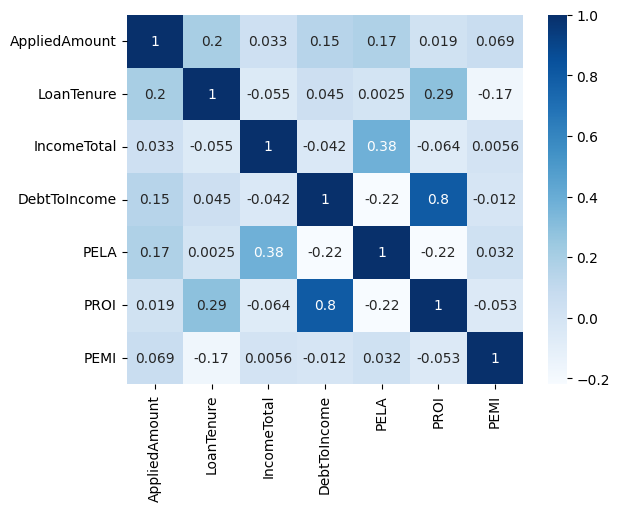

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

IMPORT LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

PREFERED RATE OF INTREST IS TARGET VARIBLE

In [ ]:
# spliting the data set into dependent and independent feature
X = data.iloc[:,[0,1,2,3]].values    # independent feature
Y = data.iloc[:,[4,5,6]].values # dependent feature
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

MODEL TRAINING

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()
#Now we can fit the model to our dataset
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

CROSS VALIDATION SCORE

In [ ]:
from sklearn.model_selection  import cross_val_score

In [ ]:
mse=cross_val_score(lin_reg_model,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

-10194898.16797622

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.32659300311591893


In [ ]:
df['PROI'].value_counts()

6.694081     28850
4.694081     27794
3.694081     24889
14.694081    10332
1.694081      9122
7.694081      8659
13.694081     6413
16.694081     6179
2.694081      3930
17.694081     2628
11.694081     2224
12.694081     1405
5.694081      1385
15.694081      719
Name: PROI, dtype: int64

COUNT PLOT OF PROI VALUES

<Axes: xlabel='PROI', ylabel='count'>

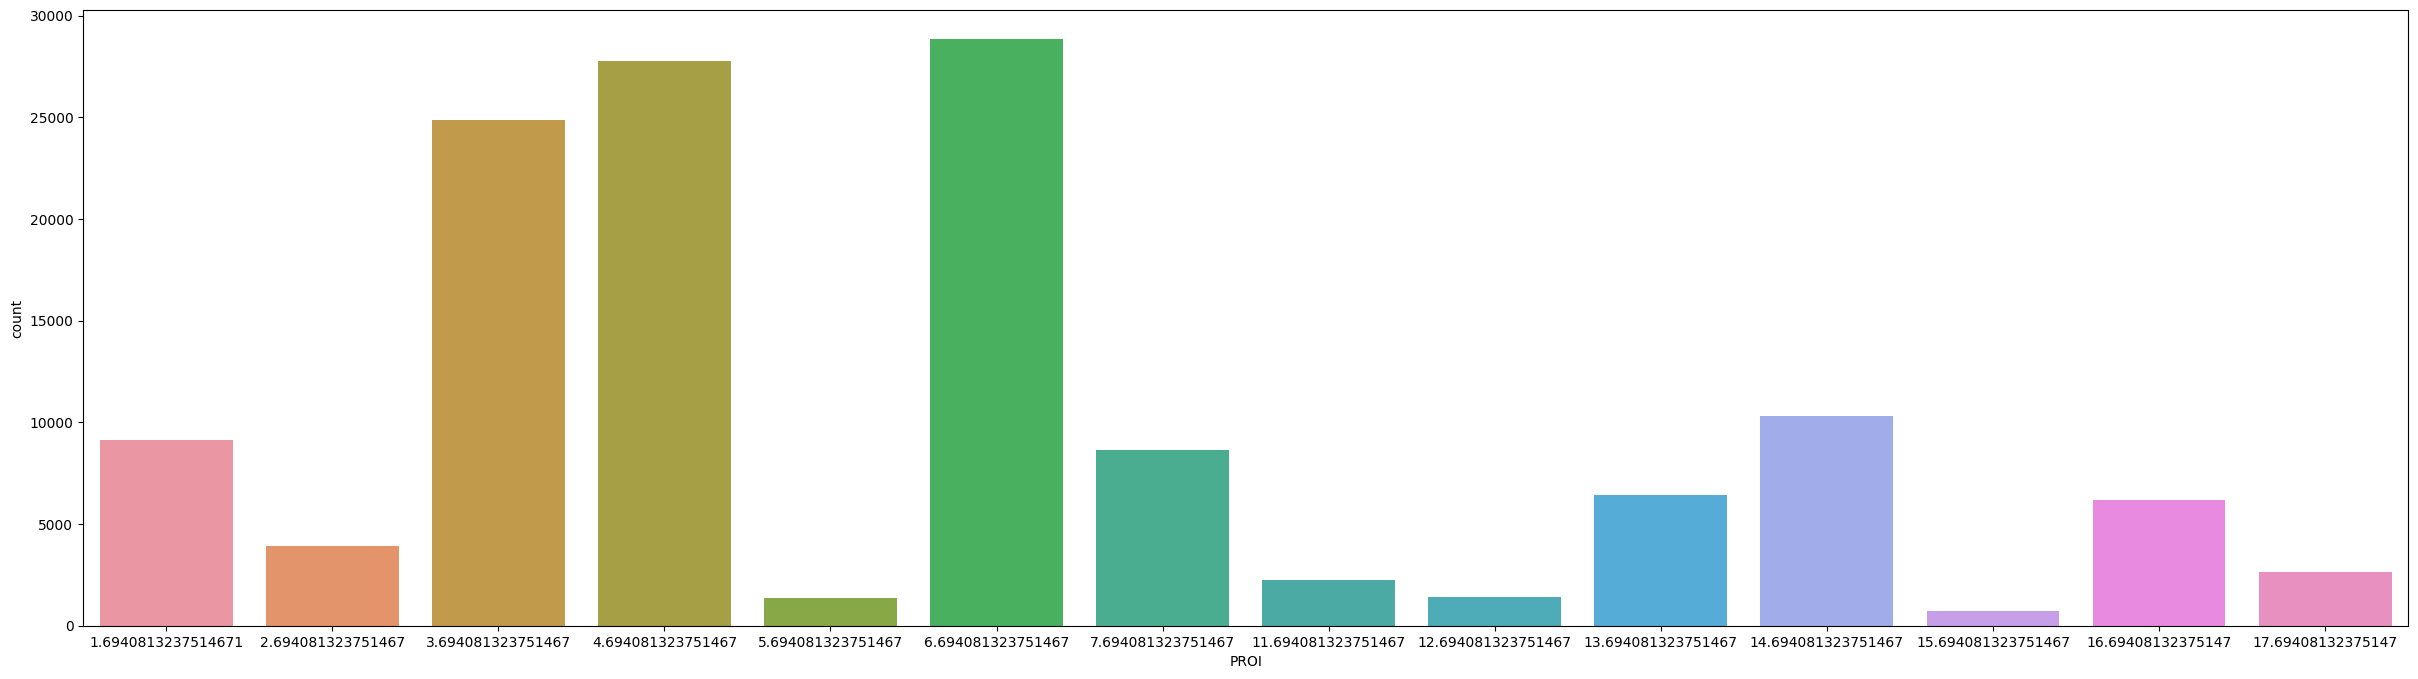

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='PROI',data=df)

PREDICTING THE VALUES

In [ ]:
Y_pred = lin_reg_model.predict(X_test)

In [ ]:
print(Y_pred)

[[ 4.03210566e+02  5.71625451e+00  3.01912846e+02]
 [ 4.11684866e+02  4.13924031e+00  1.65271416e+03]
 [ 2.97497663e+02  6.50331729e+00 -3.98649559e+02]
 ...
 [ 4.49827736e+02  4.07695014e+00  1.68974216e+03]
 [ 4.95236266e+02  1.92178393e+00  3.55255664e+03]
 [ 3.64562540e+02  4.47764946e+00  1.35182630e+03]]


R2 VALUE

In [ ]:
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.34470196056435887


ACCURACY OF MODEL

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))


The accuracy of our model is 34.0%


SCATTER PLOT

Text(0, 0.5, 'Predicted')

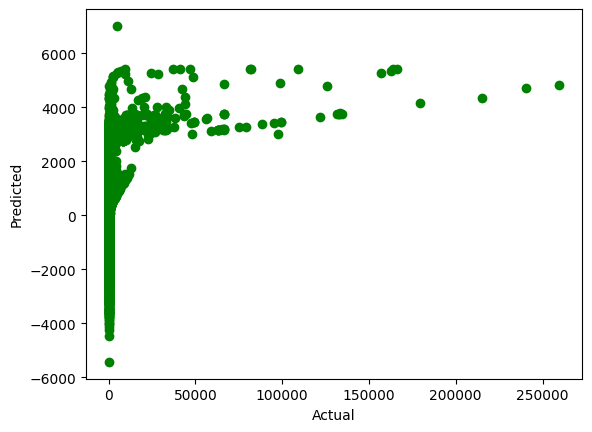

In [ ]:
plt.scatter(Y_test,Y_pred,color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')

SCATTER PLOT WITH DECISION BOUNDARY

VARIANCE GRAPH

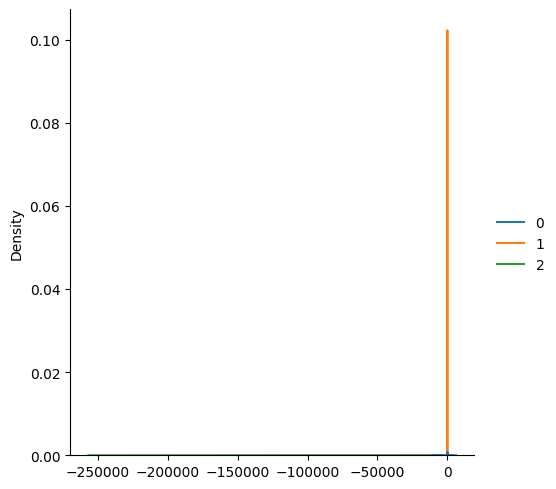

In [ ]:
sns.displot(Y_pred-Y_test,kind='kde')

ERROR CALCULATIONS

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 428.64472517863516
Mean Squared Error: 8082643.54062372
Root Mean Squared Error: 2842.999039856278


DATA FRAME CONTAIN PREDICT AND ACTUAL AND DIFFERNCE

# RIDGE REGRESSION

In [ ]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
data.head()

,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome,PELA,PROI,PEMI
0,319.5582,12.287727,10500.0,0.0,319.5582,2.694081,10.989417
1,191.7349,0.985647,10800.0,0.0,191.7349,2.694081,145.603739
2,319.5582,58.908807,7000.0,0.0,319.5582,5.694081,9.467025
3,127.8233,15.014682,11600.0,0.0,127.8233,2.694081,5.079705
4,319.5582,12.353436,6800.0,0.0,319.5582,2.694081,30.385832


In [ ]:
data.shape

(134529, 7)

In [ ]:
# spliting the data set into dependent and independent feature
X1 = data.iloc[:,[0,1,2,3]].values    # independent feature
Y1 = data.iloc[:,[4,5,6]]  # dependent feature
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=0)

IMPORT RIDGE REGRESSION

In [ ]:
ridge_regressor=Ridge()

TUNING WOTH DIFFEREBT ALPHAS

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0,1,2,3,4,5,6,7,8,9,10,20,50,100,0.01,0.05]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X1_train,Y1_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50,
                                   100, 0.01, 0.05]},
             scoring='neg_mean_squared_error')

BEST PARAMETER

In [ ]:
print(ridgecv.best_params_)

{'alpha': 100}


In [ ]:
print(ridgecv.best_score_)

-10194898.155322764


In [ ]:
training_data_prediction = ridgecv.predict(X_train)

In [ ]:
# R squared Error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  -0.32431342354191806


PREDICTING THE VALUES

In [ ]:
Y1_pred=ridgecv.predict(X1_test)

In [ ]:
print(Y1_pred)

[[ 4.03210359e+02  5.71626051e+00  3.01913916e+02]
 [ 4.11684652e+02  4.13925028e+00  1.65271159e+03]
 [ 2.97497512e+02  6.50332053e+00 -3.98647688e+02]
 ...
 [ 4.49827524e+02  4.07696011e+00  1.68973954e+03]
 [ 4.95236021e+02  1.92179973e+00  3.55254948e+03]
 [ 3.64562351e+02  4.47765824e+00  1.35182406e+03]]


VARIANCE VALUES

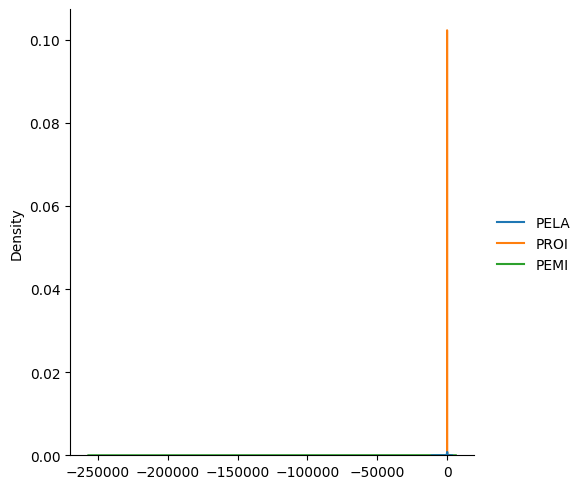

In [ ]:
sns.displot(Y1_pred-Y1_test,kind='kde')

In [ ]:
test_error_score = metrics.r2_score(Y1_test, Y1_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.34470195945054155


R2 SCORE

ACCURACY OF MODEL

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(Y1_test,Y1_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 34.0%


SCATTER PLOT

Text(0, 0.5, 'Predicted')

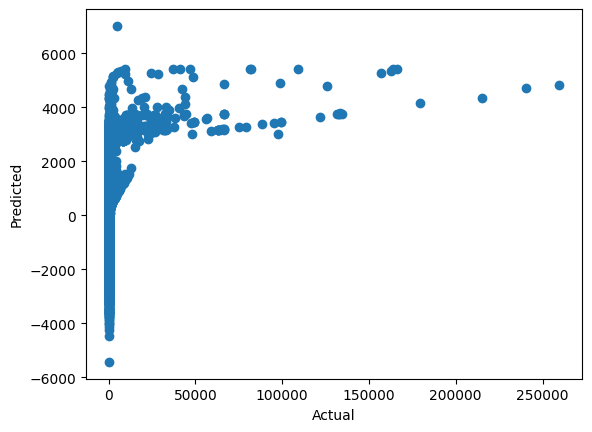

In [ ]:
plt.scatter(Y1_test,Y1_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

ERROR CALCULATIONS

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test,Y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test,Y1_pred)))

Mean Absolute Error: 428.644080727509
Mean Squared Error: 8082643.272946961
Root Mean Squared Error: 2842.9989927798006


PIPELINE

In [ ]:
d#ata=pd.read_csv('/content/drive/MyDrive/regression.csv')
#data.head()
#data=data.drop(['Unnamed: 0'],axis=1)
#data.head()

,DebtToIncome,Target
9479,31.05,1
19807,31.05,0
17813,31.06,0
74378,31.06,0
14097,31.06,1
...,...,...
11636,77.00,0
74761,79.96,0
11665,83.33,0
11533,110.44,0


In [ ]:
# Split the data into features (X) and target (y)
#X_data = data.drop('PROI', axis=1)
#y_data = data['PROI']
#X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size=0.25,random_state=4)

PIPELINE FORMATION FOR REGRESSION MODEL

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipeline_ridge=Pipeline([('ridge_regressor',Ridge())])

In [ ]:
pipeline_ridge.fit(X1_train, Y1_train)

Pipeline(steps=[('ridge_regressor', Ridge())])

In [ ]:
y_data_pred = pipeline_ridge.predict(X1_test)

In [ ]:
print(y_data_pred)

[[ 4.03210564e+02  5.71625457e+00  3.01912857e+02]
 [ 4.11684864e+02  4.13924041e+00  1.65271413e+03]
 [ 2.97497662e+02  6.50331733e+00 -3.98649540e+02]
 ...
 [ 4.49827734e+02  4.07695024e+00  1.68974213e+03]
 [ 4.95236263e+02  1.92178409e+00  3.55255657e+03]
 [ 3.64562538e+02  4.47764955e+00  1.35182628e+03]]


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(Y1_test,y_data_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 34.0%


In [ ]:
import pickle

In [ ]:
pickle.dump(pipeline_ridge, open('/content/drive/MyDrive/Regression_Analysis', 'wb'))

TAKING INPUT TO USER

In [ ]:
import pandas as pd

d1 = pd.DataFrame(columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'AppliedAmount','LoanTenure','IncomeTotal','DebtToIncome'
       ])
parts = int(input("Enter the number of day rows:"))

for _ in range(parts):
    a = input("Enter BidsPortfolioManager:: ")
    b = input("Enter Interest:: ")
    c = input("Enter  MonthlyPayment:: ")
    d = input("Enter Rating:: ")
    e = input("Enter PrincipalPaymentsMade:: ")
    f = input("Enter NoOfPreviousLoansBeforeLoan:: ")
    g = input("Enter  PrincipalBalance:: ")
    h = input("Enter  InterestAndPenaltyBalance:: ")
    i = input("Enter  AmountOfPreviousLoansBeforeLoan:: ")
    j = input("Enter  PreviousRepaymentsBeforeLoan:: ")
    k = input("Enter  AppliedAmount:: ")
    l = input("Enter  LoanTenure:: ")
    m = input("Enter  IncomTotal:: ")
    n = input("Enter  DebtToIncome:: ")
    d2 = pd.DataFrame(data=[[a,b,c,d,e,f,g,h,i,j,k,l,m,n]],columns=['BidsPortfolioManager', 'Interest', 'MonthlyPayment', 'Rating',
       'PrincipalPaymentsMade', 'NoOfPreviousLoansBeforeLoan',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'AppliedAmount', 'LoanTenure','IncomeTotal', 'DebtToIncome'
       ])
    data = pd.concat([d1,d2], axis=0)

data.index = range(len(data.index))
data

Enter the number of day rows:1
Enter BidsPortfolioManager:: 0
Enter Interest:: 22
Enter  MonthlyPayment:: 110
Enter Rating:: 3
Enter PrincipalPaymentsMade:: 10
Enter NoOfPreviousLoansBeforeLoan:: 2
Enter  PrincipalBalance:: 100
Enter  InterestAndPenaltyBalance:: 2
Enter  AmountOfPreviousLoansBeforeLoan:: 10
Enter  PreviousRepaymentsBeforeLoan:: 9
Enter  AppliedAmount:: 300
Enter  LoanTenure:: 1
Enter  IncomTotal:: 20
Enter  DebtToIncome:: 8


,BidsPortfolioManager,Interest,MonthlyPayment,Rating,PrincipalPaymentsMade,NoOfPreviousLoansBeforeLoan,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,AppliedAmount,LoanTenure,IncomeTotal,DebtToIncome
0,0,22,110,3,10,2,100,2,10,9,300,1,20,8


In [ ]:
#first 10 features for classification
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
#last 4 features for regression analysis
Y=data.iloc[:,[10,11,12,13]].values
output=[]

classification predition using pipeline

In [ ]:
class_pipeline = pickle.load(open("/content/drive/MyDrive/RandomForest_Classification", 'rb'))
output.append(class_pipeline.predict(X))

regression pipeline prediction

In [ ]:
reg_pipeline = pickle.load(open("/content/drive/MyDrive/Regression_Analysis", 'rb'))
output.append(reg_pipeline.predict(Y))


outputs

In [ ]:
print("PERSON ELIGIBILITY(0/1):: ",output[0])
print("PREFERED 1.ELA 2.ROI 3.EMI :: ",output[1])


PERSON ELIGIBILITY(0/1)::  [0]
PREFERED 1.ELA 2.ROI 3.EMI ::  [[ 191.87188954    4.70561067 2599.45121384]]


In [ ]:
print(output[0],output[1])

[0] [[ 191.87188954    4.70561067 2599.45121384]]
